## Work distributions for a harmonic oscillator in the canonical ensemble

### Hoover-Holian

\begin{eqnarray}
\dot{q} &=& p \\
\dot{p} &=& - \left(1 + \frac{t}{t_s} \right)^2 q - {\zeta p} - \beta \xi p^3 \\
\dot{\zeta} &=& \frac{\beta p^2 - 1}{\tau^2} \\
\dot{\xi} &=& \frac{\beta^2 p^4 - 3 \beta p^2}{\tau^2} \\
\dot{\nu} &=& \zeta + 3\beta \xi p^2
\end{eqnarray}


$$ H = \frac{p^2}{2} + \omega_{\lambda}^2 \frac{x^2}{2} $$
con 
$$ \omega_{\lambda} = 1 + \lambda \qquad \lambda(t) = \frac{t}{t_s} $$

In [1]:
using DifferentialEquations
import Distributions.Normal
import Distributions.Logistic

In [2]:
using PyPlot

In [3]:
const b = 1.0/1.5;
const QNH = 1.0;
const tauHH = 1.0;
const QLog = 1.0;
Ns = 10^6;

In [4]:
function HooverHolian(t, u, du; tau=tauHH, ts=1., beta = b) 
    du[1] = u[2]
    du[2] = -(1+t/ts)^2*u[1] - u[3]*u[2] - beta*u[4]*u[2]^3
    #du[2] = -(1)^2*u[1] - u[3]*u[2] - beta*u[4]*u[2]^3   ##Isothermal dynamics (omega = 1)
    du[3] = (beta*u[2]^2 - 1)/tau^2 
    du[4] = (beta^2*u[2]^4 - 3*beta*u[2]^2)/tau^2
    du[5] = u[3] + 3*beta*u[4]*u[2]^2
end 

HooverHolian (generic function with 1 method)

In [5]:
function workHH()
    q0,p0 = rand(Normal(0.0, 1./sqrt(b)),2)
    zeta0, xi0 = rand(Normal(0.0, 1./tauHH),2)
    nu0 = 0.0
    u0HH = [q0,p0,zeta0,xi0, nu0]
    I0 = q0^2/2. + p0^2./2. + tauHH^2.*zeta0^2./(2*b) + tauHH^2.*xi0^2/(2*b)
    tspan = (0.0,1.0)
    probHH = ODEProblem(HooverHolian,u0HH,tspan)
    solHH = solve(probHH);
    HHsol = solHH.u;
    qf, pf, zetaf, xif, nuf = HHsol[end];
    If = 4.*qf^2/2. + pf^2./2. + tauHH^2.*zetaf^2./(2*b) + tauHH^2.*xif^2/(2*b)
    return If - I0 + 1./b*nuf
end

workHH (generic function with 1 method)

In [6]:
workHH()

1.6269824852697279

In [7]:
#Ns = 10^5
w_HH = zeros(Ns);
for i in 1:Ns
    w_HH[i] = workHH()
end

In [8]:
deltaF_HH = -1/b.*log(mean(exp(-b*w_HH)))  ##Theoretical = 1.0397

1.0378856898739406

In [9]:
mean(w_HH)

1.8776571438262015

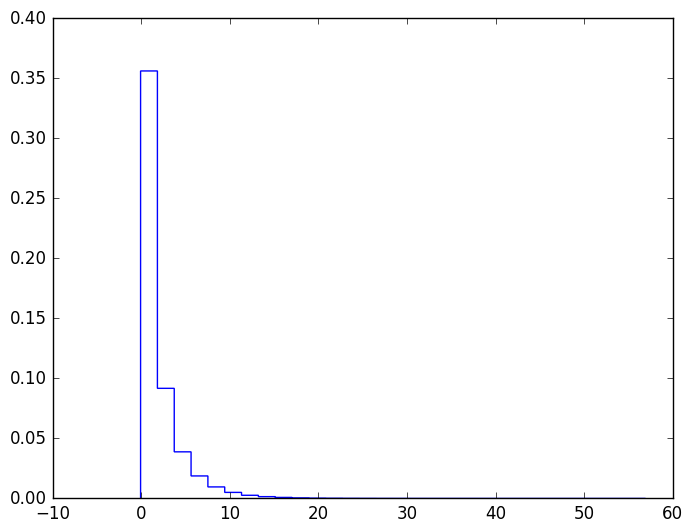

([0.356246,0.0917654,0.0388412,0.0187574,0.0096066,0.00504173,0.00263324,0.00149847,0.000854236,0.000469488  …  0.0,0.0,5.26332e-7,0.0,0.0,0.0,0.0,0.0,0.0,5.26332e-7],[-0.0757324,1.82421,3.72415,5.6241,7.52404,9.42398,11.3239,13.2239,15.1238,17.0238  …  39.8231,41.723,43.623,45.5229,47.4228,49.3228,51.2227,53.1227,55.0226,56.9226],Any[PyObject <matplotlib.patches.Polygon object at 0x7fee9844fe90>])

In [10]:
plt[:hist](w_HH,bins = 30, normed = true, histtype="step")
#histogram(w_HH,nbins = 30, normed = true)

In [11]:
#deltaiHH = [HHsol[i][2]^2/2.  + HHsol[i][1]^2/2. + tauHH^2.*HHsol[i][3]^2/(2.*b) + tauHH^2.*HHsol[i][4]^2/(2.*b) + 1./b*HHsol[i][5] for i in 1:length(HHsol)] - I0;

In [12]:
#plot(deltaiHH)

### Nosé-Hoover

$$ f(\zeta) = \sqrt{\frac{\beta}{2\pi Q}} \exp\left(-\frac{\beta \zeta^2}{2 Q} \right) $$

\begin{eqnarray}
\dot{q} &=& p \\
\dot{p} &=& -\left(1 + \frac{t}{t_s} \right)^2 q - \frac{\zeta p}{Q} \\
\dot{\zeta} &=& p^2 - \frac{1}{\beta} \\
\dot{\nu} &=& \frac{\zeta}{Q}
\end{eqnarray}

In [13]:
function NoseHoover(t, u, du; ts=1., beta = b, Q = QNH) 
    du[1] = u[2]
    du[2] = -(1+t/ts)^2*u[1] - u[3]*u[2]/Q 
    #du[2] = -(1)^2*u[1] - u[3]*u[2]/Q  ##Isothermal dynamics (omega = 1)
    du[3] = u[2]^2 - 1/beta
    du[4] = u[3]/Q
end 

NoseHoover (generic function with 1 method)

In [14]:
function workNH()
    q0,p0 = rand(Normal(0.0, 1./sqrt(b)),2)
    zeta0 = rand(Normal(0.0, QNH/sqrt(b)))
    nu0 = 0.0
    u0NH = [q0,p0,zeta0,nu0]
    I0 = q0^2/2. + p0^2./2. + zeta0^2./(2*QNH)
    tspan = (0.0,1.0)
    probNH = ODEProblem(NoseHoover,u0NH,tspan)
    solNH = solve(probNH);
    NHsol = solNH.u;
    qf, pf, zetaf, nuf = NHsol[end];
    If = 4.*qf^2/2. + pf^2./2. + zetaf^2./(2*QNH) 
    return If - I0 + 1./b*nuf
end

workNH (generic function with 1 method)

In [15]:
workNH()

1.846106312413717

In [16]:
#Ns = 10^5
w_NH = zeros(Ns);
for i in 1:Ns
    w_NH[i] = workNH()
end

In [17]:
deltaF_NH = -1/b.*log(mean(exp(-b*w_NH)))  ##Theoretical = 1.0397

1.038684652723422

In [18]:
mean(w_NH)

1.8590272552709397

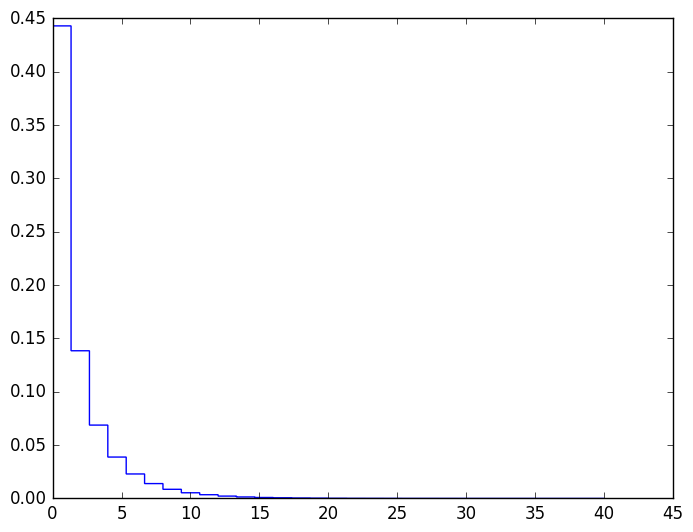

([0.443022,0.138457,0.0687661,0.0387998,0.0229538,0.0139307,0.00857328,0.00532148,0.00349543,0.00220235  …  2.77355e-5,1.64914e-5,1.19937e-5,6.74648e-6,4.49766e-6,2.99844e-6,1.49922e-6,7.49609e-7,0.0,1.49922e-6],[1.79551e-6,1.33403,2.66806,4.00209,5.33612,6.67014,8.00417,9.3382,10.6722,12.0063  …  28.0146,29.3486,30.6827,32.0167,33.3507,34.6847,36.0188,37.3528,38.6868,40.0209],Any[PyObject <matplotlib.patches.Polygon object at 0x7fee98b0b890>])

In [19]:
plt[:hist](w_NH,bins = 30, normed = true, histtype="step")
#histogram(w_NH,nbins = 30, normed = true)

In [20]:
#deltaiNH = [NHsol[i][2]^2/2.  + NHsol[i][1]^2/2. + NHsol[i][3]^2/(2.*QNH)  + 1./b*NHsol[i][4] for i in 1:length(solNH.u)] - I0;

### Logistic thermostat

\begin{eqnarray}
\dot{q} &=& p \\
\dot{p} &=& -\left(1 + \frac{t}{t_s} \right)^2 q - \frac{\tanh\left(\frac{\zeta}{2Q} \right)p}{\beta Q} \\
\dot{\zeta} &=& p^2 - \frac{1}{\beta} \\
\dot{\nu} &=& \frac{\tanh\left(\frac{\zeta}{2Q} \right)}{\beta Q}
\end{eqnarray}

In [21]:
function LogisticTh(t, u, du; ts=1., beta = b, Q = Qlog) 
    du[1] = u[2]
    du[2] = -(1+t/ts)^2*u[1] - tanh(u[3]/(2*Q))*u[2]/(beta*Q)
    #du[2] = -(1)^2*u[1] - u[3]*u[2]/Q  ##Isothermal dynamics (omega = 1)
    du[3] = u[2]^2 - 1/beta
    du[4] = tanh(u[3]/(2*Q))*u[2]/(beta*Q)
end 

LogisticTh (generic function with 1 method)

In [22]:
function worklog()
    q0,p0 = rand(Normal(0.0, 1./sqrt(b)),2)
    z0 = rand(Logistic(0.0,QLog))
    nu0 = 0.0
    u0NH = [q0,p0,z0,nu0]
    I0 = q0^2/2. + p0^2./2. - log(exp(z0/QLog)/(QLog*(1+exp(z0/QLog))^2.))/b
    tspan = (0.0,1.0)
    probNH = ODEProblem(NoseHoover,u0NH,tspan)
    solNH = solve(probNH);
    NHsol = solNH.u;
    qf, pf, zf, nuf = NHsol[end];
    If = 4.*qf^2/2. + pf^2./2. - log(exp(zf/QLog)/(QLog*(1+exp(zf/QLog))^2.))/b
    return If - I0 + 1./b*nuf
end

worklog (generic function with 1 method)

In [23]:
worklog()

4.077962515772247

In [24]:
#Ns = 10^5
w_log = zeros(Ns);
for i in 1:Ns
    w_log[i] = worklog()
end

In [25]:
deltaF_log = -1/b.*log(mean(exp(-b*w_log)))  ##Theoretical = 1.0397

1.0387919317451115

In [26]:
mean(w_log)

2.073158702003492

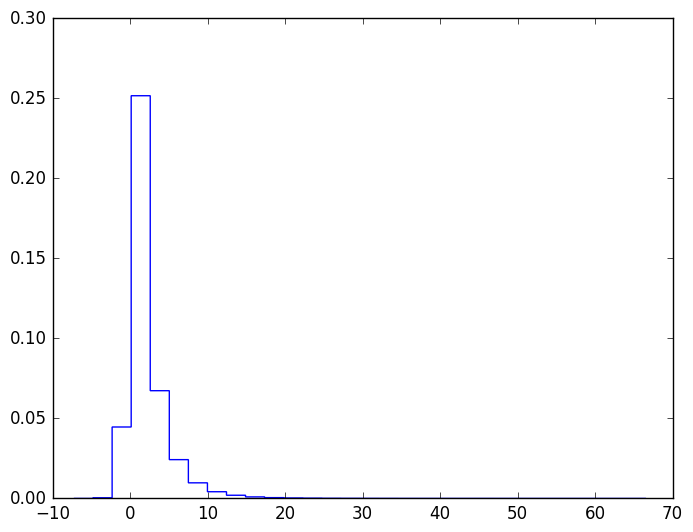

([1.05707e-5,0.000420387,0.0446545,0.251699,0.0673416,0.0242544,0.00975794,0.00419574,0.00199623,0.000963963  …  3.65908e-6,4.87877e-6,1.21969e-6,8.13128e-7,8.13128e-7,4.06564e-7,0.0,0.0,0.0,4.06564e-7],[-7.24917,-4.78953,-2.3299,0.129742,2.58938,5.04902,7.50865,9.96829,12.4279,14.8876  …  44.4032,46.8629,49.3225,51.7821,54.2418,56.7014,59.161,61.6207,64.0803,66.54],Any[PyObject <matplotlib.patches.Polygon object at 0x7fee9896d150>])

In [27]:
plt[:hist](w_log,bins = 30, normed = true, histtype="step")
#histogram(w_log,nbins = 30, normed = true)

## Comparison

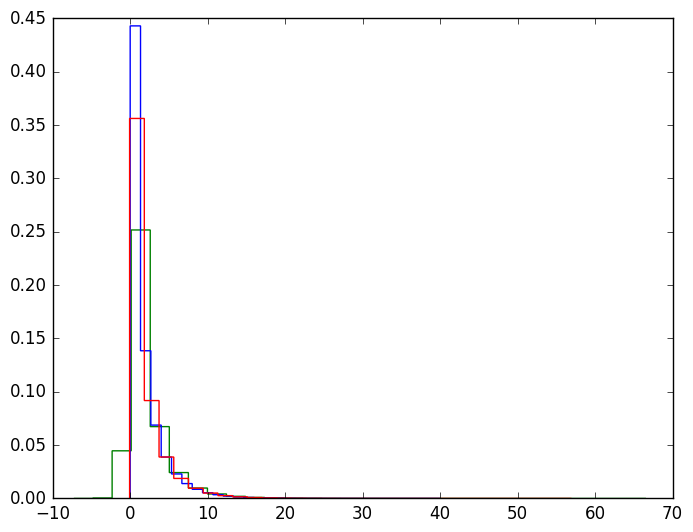

([0.356246,0.0917654,0.0388412,0.0187574,0.0096066,0.00504173,0.00263324,0.00149847,0.000854236,0.000469488  …  0.0,0.0,5.26332e-7,0.0,0.0,0.0,0.0,0.0,0.0,5.26332e-7],[-0.0757324,1.82421,3.72415,5.6241,7.52404,9.42398,11.3239,13.2239,15.1238,17.0238  …  39.8231,41.723,43.623,45.5229,47.4228,49.3228,51.2227,53.1227,55.0226,56.9226],Any[PyObject <matplotlib.patches.Polygon object at 0x7fee95fc0510>])

In [28]:
plt[:hist](w_log,bins = 30, normed = true, histtype="step", color="g")
plt[:hist](w_NH,bins = 30, normed = true, histtype="step", color = "blue")
plt[:hist](w_HH,bins = 30, normed = true, histtype="step", color = "red")